Статистический анализ данных. 
    
Есть данные от популярного сервиса аренды самокатов GoFast - данные о некоторых пользователях из нескольких городов, а также об их поездках. 
    
Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 
8
8 рублей;
стоимость старта (начала поездки) — 
50
50 рублей;
с подпиской Ultra
абонентская плата — 
199
199 рублей в месяц;
стоимость одной минуты поездки — 
6
6 рублей;
стоимость старта — бесплатно.

    
Описание данных.
    

В основных данных есть информация о пользователях, их поездках и подписках.    
    
Пользователи — users_go.csv:
* user_id	уникальный идентификатор пользователя
* name	имя пользователя
* age	возраст
* city	город
* subscription_type	тип подписки (free, ultra)
    
    
    
Поездки — rides_go.csv:
* user_id	уникальный идентификатор пользователя
* distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
* duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date	дата совершения поездки.
    
    
Подписки — subscriptions_go.csv:
* subscription_type	тип подписки
* minute_price	стоимость одной минуты поездки по данной подписке
* start_ride_price	стоимость начала поездки
* subscription_fee	стоимость ежемесячного платежа.

План работы.

1. Загрузить и изучить данные.

2. Осуществить предобработку данных (Привести столбец date к типу даты pandas, Создать новый столбец с номером месяца на основе столбца date, Проверить наличие пропущенных значений и дубликатов в датафреймах. Обработать их, если такие значения присутствуют).

3. Провести Исследовательский анализ данных:
Описать и визуализировать общую информацию о пользователях и поездках:
* 3.1 частота встречаемости городов;
* 3.2 соотношение пользователей с подпиской и без подписки;
* 3.3 возраст пользователей;
* 3.4 расстояние, которое пользователь преодолел за одну поездку;
* 3.5 продолжительность поездок.

4.  Осуществить объединение данных
* 4.1 Объединить данные о пользователях, поездках и подписках в один датафрейм (методом merge()).
* 4.2 Создать ещё два датафрейма из датафрейма, созданного на этапе 4.1:
 - c данными о пользователях без подписки;
 - с данными о пользователях с подпиской.
* 4.3 Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.

5. Подсчитать выручку.
* 5.1 Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
* 5.2 В этот же датафрейм добавить столбец с помесячной выручкой, которую принёс каждый пользователь (Для этого обратиться к информации об условиях оплаты для подписчиков и тех, у кого нет подписки). Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
* 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверить гипотезу. Использовать исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
* 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверить гипотезу и сделать выводы.
* 6.3 Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделать вывод.
* 6.4 Представить такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?

In [1]:
import pandas as pd
import numpy as np

#### Шаг 1. Загрузка данных

In [2]:
users_data = pd.read_csv('/datasets/users_go.csv')
display(users_data.info())
users_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
rides_data= pd.read_csv('/datasets/rides_go.csv')
display(rides_data.info())
#print(rides_data.head())
temp = rides_data['distance'].unique()
#sorted(temp) # нулевых значений здесь нет
#rides_data['duration'] = np.ceil(rides_data['duration']) # для задания из п 5.2 - округляем вверх

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

In [4]:
subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')
display(subscriptions_data.info())
subscriptions_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Загрузили 3 датасета. Пропусков в них нет.

#### Шаг 2. Предобработка данных

приводим столбец data к типу данных pandas:

In [5]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d')
display(rides_data.head())
rides_data.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


добавляем столбец month:

In [6]:
display(rides_data['date'].value_counts())
rides_data['month'] = pd.DatetimeIndex(rides_data['date']).month

# проверяем за один год данные или за несколько:
year = pd.DatetimeIndex(rides_data['date']).year
year.unique() 

2021-12-22    72
2021-01-12    70
2021-12-27    69
2021-08-20    67
2021-06-09    67
              ..
2021-11-07    35
2021-07-30    35
2021-12-15    34
2021-02-02    34
2021-07-03    31
Name: date, Length: 364, dtype: int64

Int64Index([2021], dtype='int64', name='date')

проверяем наличие пропусков: пропусков нет

In [7]:
display(users_data.isna().sum())
display(rides_data.isna().sum())
subscriptions_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

проверяем наличие дубликатов:

In [8]:
#display(users_data.duplicated())
display(users_data['user_id'].value_counts()) #некоторые id повторяются - необходимо удалить дубликаты
print('Количество дубликатов равно ', users_data.duplicated().sum()) # нашли 31 дубликат
users_data = users_data.drop_duplicates().reset_index(drop=True)

display(users_data['user_id'].value_counts()) # теперь все id встречаются в датасете по 1 разу
print('Количество дубликатов равно ', users_data.duplicated().sum())


209     2
807     2
611     2
43      2
737     2
       ..
520     1
519     1
518     1
517     1
1534    1
Name: user_id, Length: 1534, dtype: int64

Количество дубликатов равно  31


1       1
1020    1
1029    1
1028    1
1027    1
       ..
510     1
509     1
508     1
507     1
1534    1
Name: user_id, Length: 1534, dtype: int64

Количество дубликатов равно  0


In [9]:
print(rides_data.duplicated().sum())
print(subscriptions_data.duplicated().sum())

0
0


Вывод: дубликаты были только в датасете users_data, они были удалены

<AxesSubplot:>

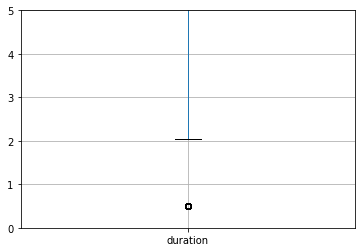

In [11]:
import matplotlib.pyplot as plt
rides_data['duration'].describe()
plt.ylim(0, 5)
rides_data.boxplot(column='duration')

0.5367776552505346


,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


,user_id,distance,duration,date,month
6679,712,2235.247794,18.579633,2021-01-05,1
6680,712,4684.004397,0.500000,2021-03-04,3
6681,712,401.601185,14.268214,2021-03-31,3
6682,712,2243.336137,12.852181,2021-04-07,4
6683,712,2377.171297,10.705211,2021-07-04,7
6684,712,2729.394629,18.917579,2021-08-14,8
6685,712,3220.067036,12.400175,2021-08-22,8
6686,712,3457.771060,21.860569,2021-09-24,9
6687,712,2047.063241,12.773128,2021-10-21,10
6688,712,2030.482218,7.685728,2021-10-23,10


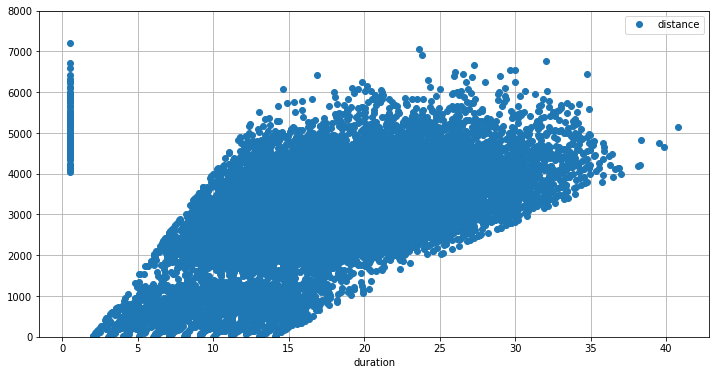

In [12]:
rides_data.plot(x='duration', y='distance', style='o', ylim=(0, 8000), grid=True, figsize=(12, 6))
print(rides_data['duration'].corr(rides_data['distance']))
display(rides_data[rides_data['duration'] == 0.5])
rides_data[rides_data['user_id'] == 712]

    
Выбросы, судя по боксплоту, есть в обеих выборках. Максимальные расстояния вполнне можно проехать за максимально представленное время, но на графике видно, что есть определенная группа поездок с практически нулевым временем (полминуты), при этом пройденное расстояние - от 4 км и больше (до 7 км и  более, т.е. нереальное). Данные пользователей (id, расстояние, время) у всех таких строк разные, похоже, это реально зафиксированные поездки, по которым длительность принято было учитывать за полминуты. Пока могу только предположить, что это были разовые акции (типа, следующая поездка по цене 1 минуты).

#### Шаг 3. Исследовательский анализ данных. 
Опишем и визуализируем общую информацию о пользователях и поездках:

3.1. частота встречаемости городов

Text(0.5, 0, 'Количество пользователей')

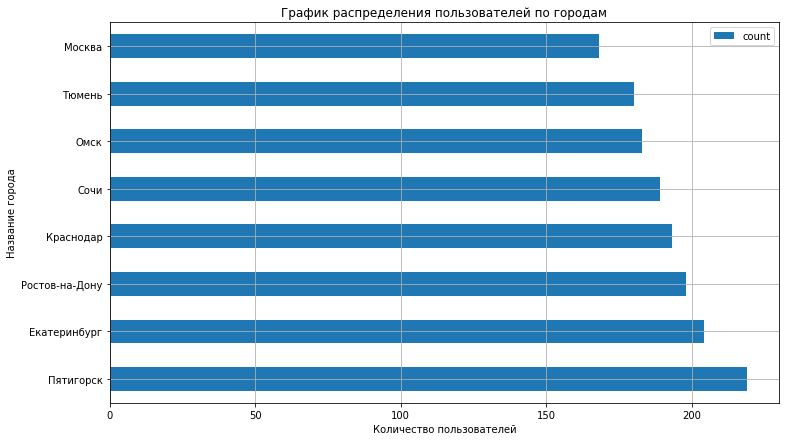

In [13]:
nd =    (users_data 
    .pivot_table(index='city', values='user_id', aggfunc=['count'])
        )
nd.columns = ['count']
nd = nd.sort_values(by = 'count', ascending = False)
nd.plot(kind = 'barh', grid=True, figsize=(12, 7))
plt.title('График распределения пользователей по городам')
plt.ylabel('Название города')
plt.xlabel('Количество пользователей')
#plt.text(nd['count'], ['city'], ['count'])

    


,count
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


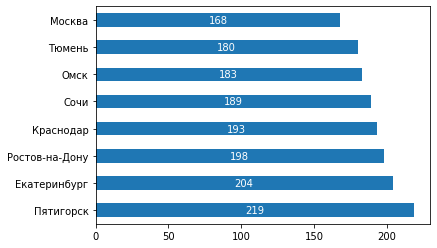

In [14]:
ax = users_data['city'].value_counts().plot(kind='barh')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width() * 0.5, p.get_y() + p.get_height() * 0.5), ha='center', va='center', color='white');
display(nd) 

3.2 соотношение пользователей с подпиской и без подписки

                   count
subscription_type       
free                 835
ultra                699
Соотношение пользователей с подпиской и без подписки равно: 1.1946, т.е. пользователей без подписки больше на 19.46%, , чем пользователей с подпиской


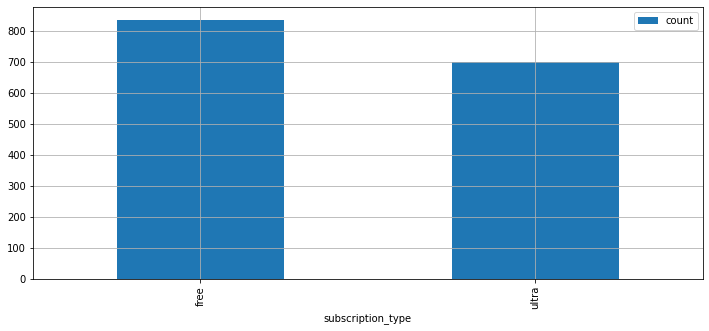

In [15]:
nd =    (users_data 
    .pivot_table(index='subscription_type', values='user_id', aggfunc=['count'])
        )
nd.columns = ['count']
nd = nd.sort_values(by = 'count', ascending = False)
nd.plot(kind = 'bar', grid=True, figsize=(12, 5))
print(nd)

ratio = nd.loc['free', 'count'] / nd.loc['ultra', 'count']
print(f'Соотношение пользователей с подпиской и без подписки равно: {round(ratio, 4)}, т.е. пользователей без \
подписки больше на {round((ratio - 1)*100, 2)}%, , чем пользователей с подпиской')

Text(0, 0.5, 'Количество пользователей')

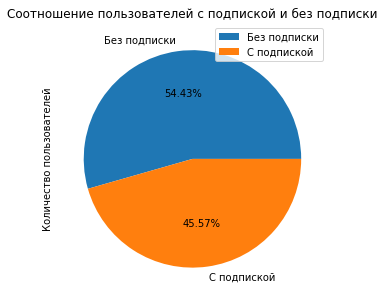

In [16]:
nd.plot(kind = 'pie', grid=True, figsize=(12, 5), subplots = True, labels = \
        ['Без подписки', 'С подпиской'], autopct='%1.2f%%')
plt.title('Cоотношение пользователей с подпиской и без подписки')
plt.ylabel('Количество пользователей')

3.3 возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

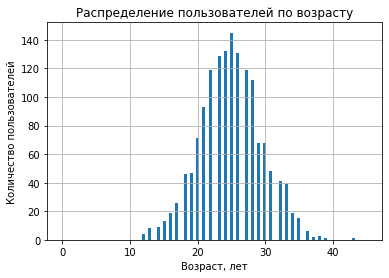

In [17]:
users_data.hist('age', bins = 100, range = (0, 45))
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество пользователей')
users_data['age'].describe()

возраст пользователей нормально распределен с мин. и макс. значениями около 13 и 44 лет, средний возраст - около 25 лет

3.4 расстояние, которое пользователь преодолел за одну поездку

count     1534.000000
mean     36167.330144
std      13118.521744
min       5530.344048
25%      26391.076407
50%      35494.886400
75%      44789.726858
max      79325.846482
Name: sum, dtype: float64

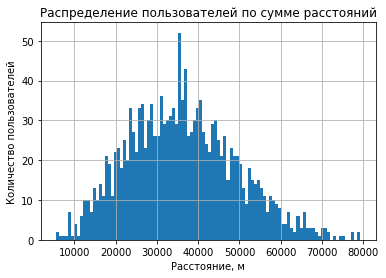

In [18]:
nd =    (rides_data 
    .pivot_table(index='user_id', values='distance', aggfunc=['sum'])
        )
nd.columns = ['sum']
nd.hist('sum', bins = 100)
plt.title('Распределение пользователей по сумме расстояний')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
nd['sum'].describe()


распределение преодоленных пользователями расстояний так же похоже на нормальное, среднее и медиана не сильно отличаются друг от друга (т.е. значимых аномалий нет), в среднем пользователи преодолели 36 км.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

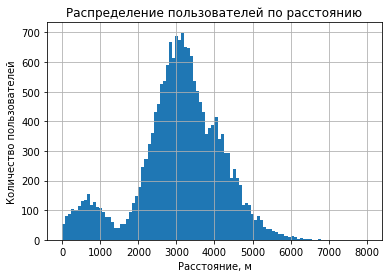

In [19]:
rides_data.hist('distance', bins = 100, range = (0, 8000))
plt.title('Распределение пользователей по расстоянию')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
rides_data['distance'].describe()

3.5 продолжительность поездок

count    1534.000000
mean      209.713782
std        73.717086
min        34.157765
25%       156.744972
50%       205.399853
75%       258.638565
max       446.233013
Name: sum, dtype: float64

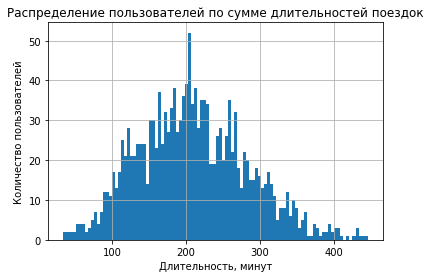

In [20]:
nd =    (rides_data 
    .pivot_table(index='user_id', values='duration', aggfunc=['sum'])
        )
nd.columns = ['sum']
nd.hist('sum', bins = 100)
plt.title('Распределение пользователей по сумме длительностей поездок')
plt.xlabel('Длительность, минут')
plt.ylabel('Количество пользователей')
nd['sum'].describe()

В среднем, пользователи находятся в пути 209 минут, распределение так же похоже на нормальное, медиана и среднее практически равны, т. е. аномалий нет.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

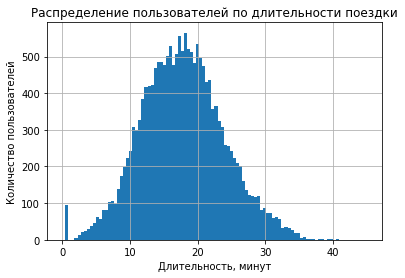

In [21]:
rides_data.hist('duration', bins = 100, range = (0, 45))
plt.title('Распределение пользователей по длительности поездки')
plt.xlabel('Длительность, минут')
plt.ylabel('Количество пользователей')
rides_data['duration'].describe()

    
Если смотреть на неагрегированные данные, то можно увидеть аномалии в районе околонулевой длительности поездки (ранее уже на них указывал). Можно было бы либо предположить причину их возникновения (например, проведение акции "следующая поездка по цене 1 минуты"), либо уточнить у источника данных что это такое.

#### Шаг 4. Объединение данных

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм

In [22]:
total_data = users_data.merge(rides_data, on='user_id') 
total_data = total_data.merge(subscriptions_data, on = 'subscription_type')
display(total_data.isna().sum())
display(total_data.info())
total_data.head()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


None

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199



    
Объединение прошло корректно, лишних записей не появилось, данные не были потеряны. Количество строк совпадает с количеством из таблицы rides_data. Пропусков нет.

4.2 Создаем ещё один датафрейм из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки

In [23]:
total_wo_subscr = total_data[(total_data['subscription_type'] == 'free')]
#print(total_wo_subscr.info())
display(total_wo_subscr.head())


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


4.2 Создаем ещё один датафрейм из датафрейма, созданного на этапе 4.1:
c данными о пользователях c подпиской

In [24]:
total_with_subscr = total_data[(total_data['subscription_type'] == 'ultra')]
#print(total_with_subscr.info())
total_with_subscr.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [25]:
total_rows = total_wo_subscr['subscription_type'].count() + total_with_subscr['subscription_type'].count()
print(total_rows)
if (total_rows) != (total_data['subscription_type'].count()):
    print('Что-то пошло не так, необходимо проверить кол-во строк в новых таблицах')
else:
    print('Разделение датафрейма прошло хорошо')

18068
Разделение датафрейма прошло хорошо


Text(0, 0.5, 'Количество пользователей')

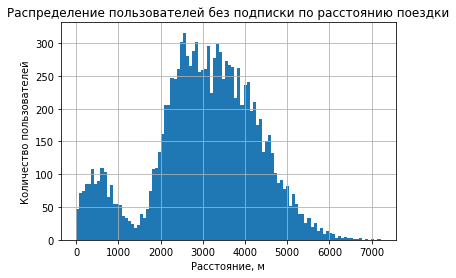

In [26]:
total_wo_subscr['distance'].hist(bins = 100)
total_wo_subscr['distance'].describe()
plt.title('Распределение пользователей без подписки по расстоянию поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')

Text(0, 0.5, 'Количество пользователей')

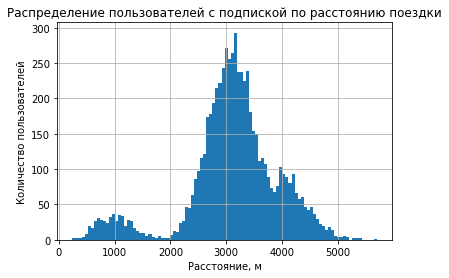

In [27]:
total_with_subscr['distance'].hist(bins = 100)
total_with_subscr['distance'].describe()
plt.title('Распределение пользователей с подпиской по расстоянию поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')

Данные этих двух графиков говорят о том, что есть 2 пика: а) Для коротких поездок (видимо, в пределах парков, здесь для пользователей без подписки среднее, т.е. первый пик - около 500 м., для пользователей с подпиской - среднее около 1 км (катаются, видимо, в обе стороны :)) ); б) Для более длительных поездок - для обеих категорий пользователей среднее (пик) составляет 3-3,5 км. (это уже, видимо, поездки не в рамках мелких локаций/парков, а вообще по городу). 

При этом распределения значений  вокруг обоих пиков на обоих графиках похожи на нормальные распределения.

Text(0, 0.5, 'Количество пользователей')

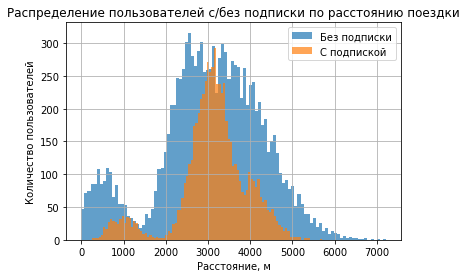

In [28]:
total_wo_subscr['distance'].hist(bins = 100, alpha=0.7, label='Без подписки')
total_wo_subscr['distance'].describe()
total_with_subscr['distance'].hist(bins = 100, alpha=0.7, label='С подпиской')
total_with_subscr['distance'].describe()
plt.legend (loc='upper right')
plt.title('Распределение пользователей с/без подписки по расстоянию поездки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')




Для наглядности совместил гистограммы на одном графике

In [29]:
display(total_wo_subscr['distance'].describe())
total_with_subscr['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

4.3  2) Визуализируем информацию о времени поездок для пользователей обеих категорий:

<AxesSubplot:>

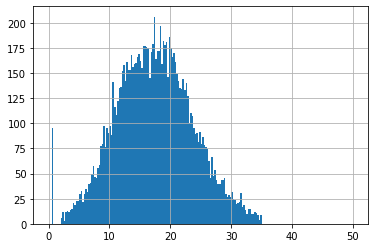

In [30]:
total_wo_subscr['duration'].hist(bins = 200, range = (0, 50))

<AxesSubplot:>

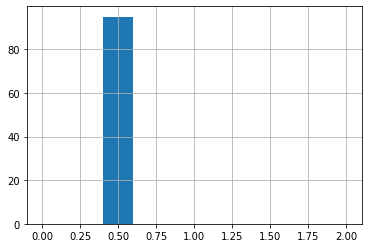

In [31]:
total_wo_subscr['duration'].hist(bins = 10, range = (0, 2))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


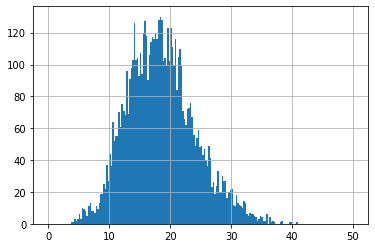

In [32]:
total_with_subscr['duration'].hist(bins = 200, range = (0, 50))
total_with_subscr.head()

На первом и втором графиках (для категории "без подписки") видно, что многие пользователи делают поездку длительностью полминуты. Ранее сы выяснили, что это может быть связано с провекдением акций (типа, поездка по цене 1 минуты). Для пользователей с подпиской таких акций не предусмотрено (здесь минимальная длительность начинается от примерно 5 минут и длительности нормально распределены). 

Что касается пользователей "без подписки", распределение их длительности поездок (за исключением пробных) также похоже на нормальное распределение.

Text(0, 0.5, 'Количество пользователей')

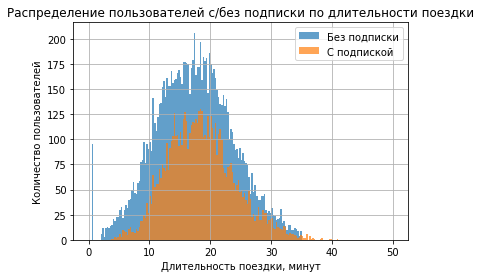

In [33]:
total_wo_subscr['duration'].hist(bins = 200, range = (0, 50), alpha=0.7, label='Без подписки')
total_with_subscr['duration'].hist(bins = 200, range = (0, 50), alpha=0.7, label='С подпиской')
plt.legend (loc='upper right')
plt.title('Распределение пользователей с/без подписки по длительности поездки')
plt.xlabel('Длительность поездки, минут')
plt.ylabel('Количество пользователей')

In [34]:
display(total_wo_subscr['duration'].describe())
total_with_subscr['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


    Графики показывают: что расстояние, что длительность поездок в среднем немного выше у пользователей с подпиской. Медианы не сильно отличаются друг от друга в обоих случаях.

3)  Теперь попробуем посмотреть зависимость расстояния от времени:

0.5557785138794201


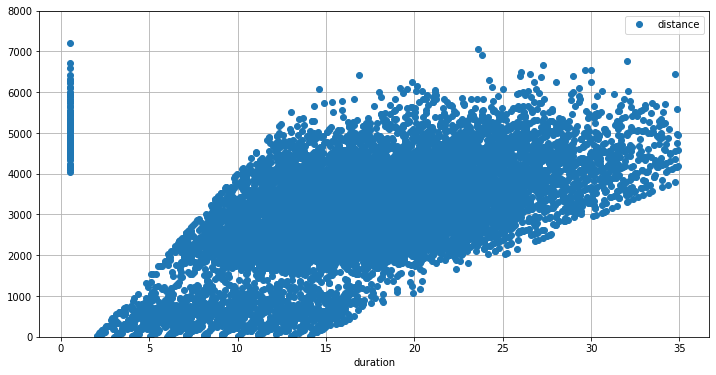

In [35]:
total_wo_subscr.plot(x='duration', y='distance', style='o', ylim=(0, 8000), grid=True, figsize=(12, 6))
print(total_wo_subscr['duration'].corr(total_wo_subscr['distance']))

0.4933405982485452


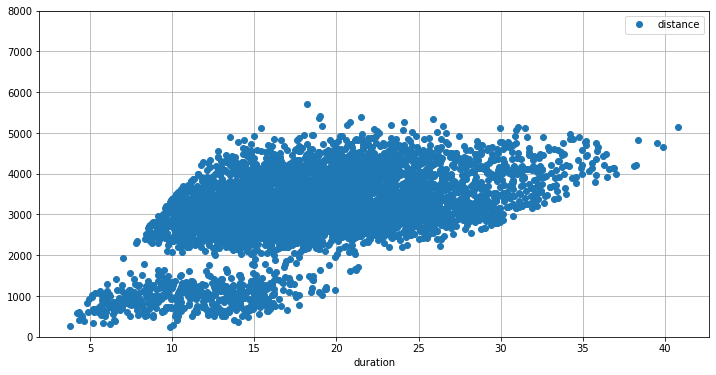

In [36]:
total_with_subscr.plot(x='duration', y='distance', style='o', ylim=(0, 8000), grid=True, figsize=(12, 6))
print(total_with_subscr['duration'].corr(total_with_subscr['distance']))

Есть достаточно сильная зависимость для обоих графиков, что подтверждается коэффициентом корреляции. Интересно, что для неопытных пользователей (без подписки) коэффициент корреляции выше. Это может объясняться тем, что пользователи с подпиской едут на бОльшие расстояния, поэтому часто меняют скорость движения (замедляются/ускоряются), и на бОльших расстояниях корреляция времени с расстоянием снижается (хотя она все равно есть).

#### Шаг 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [37]:
total_data['duration'] = np.ceil(total_data['duration']) # для задания из п 5.2 - округляем вверх
custom_agg_func = {'distance': ['count', 'sum'], 'duration': ['sum'], 'minute_price': ['first'], \
                   'start_ride_price':['first'], 'subscription_fee': ['first']}

agr_total_data = (total_data.pivot_table(index=['user_id', 'month'], aggfunc= custom_agg_func))
        
agr_total_data.columns = ['distance_count', 'distance_sum', 'duration_sum', 'minute_price', 'start_ride_price', \
                          'subscription_fee']
#agr_total_data = agr_total_data.sort_values(by = 'distance_sum', ascending = False)
print(agr_total_data.head(10))
#agr_total_data.plot(kind = 'bar', grid=True, figsize=(12, 5))

               distance_count  distance_sum  duration_sum  minute_price  \
user_id month                                                             
1       1                   2   7027.511294          42.0             6   
        4                   1    754.159807           7.0             6   
        8                   2   6723.470560          46.0             6   
        10                  2   5809.911100          32.0             6   
        11                  3   7003.499363          56.0             6   
        12                  2   6751.629942          28.0             6   
2       3                   3  10187.723006          63.0             6   
        4                   2   6164.381824          40.0             6   
        6                   1   3255.338202          14.0             6   
        7                   2   6780.722964          48.0             6   

               start_ride_price  subscription_fee  
user_id month                                  

In [38]:
agr_total_data.isna().sum() # пропусков нет, все хорошо

distance_count      0
distance_sum        0
duration_sum        0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64

5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 

*Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа (сделано в начале при выгрузке данных).

Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки 
× общая продолжительность всех поездок в минутах + стоимость подписки.

In [39]:
agr_total_data['revenue'] = agr_total_data['start_ride_price'] * agr_total_data['distance_count'] \
+ agr_total_data['minute_price'] * agr_total_data['duration_sum'] + agr_total_data['subscription_fee']
print(agr_total_data.head())


               distance_count  distance_sum  duration_sum  minute_price  \
user_id month                                                             
1       1                   2   7027.511294          42.0             6   
        4                   1    754.159807           7.0             6   
        8                   2   6723.470560          46.0             6   
        10                  2   5809.911100          32.0             6   
        11                  3   7003.499363          56.0             6   

               start_ride_price  subscription_fee  revenue  
user_id month                                               
1       1                     0               199    451.0  
        4                     0               199    241.0  
        8                     0               199    475.0  
        10                    0               199    391.0  
        11                    0               199    535.0  


#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки. Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.


Нулевая гипотеза: средние значения длительности поездок для пользователей с подпиской и без - равны.
Альтернативная гипотеза - Средние значения длительности поездок пользователей с подпиской больше средних значений длительности поездок пользователей без подписки.

In [40]:
from scipy import stats as st

alpha = 0.01 # уровень статистической значимости

results = st.ttest_ind(total_with_subscr['duration'], total_wo_subscr['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Таким образом, приходим к выводу о том, что есть основания утверждать, что продолжительнолсть поездок пользователей с подпиской больше, чем пользователей без подписки (отвергаем нулевую гипотезу об их равенстве в пользу альтернативной гипозеты - среднее значений из первой выборки больше средних значений их второй).


Нулевая гипотеза: средние значения одной поездки для пользователей с подпиской - 3130 метров.
Альтернативная гипотеза: средние значения одной поездки для пользователей с подпиской меньше 3130 метров.

In [41]:
alpha = 0.01 # уровень статистической значимости

interested_value = 3130

results = st.ttest_1samp(total_with_subscr['distance'], interested_value, alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
total_with_subscr['distance'].describe()

p-значение: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Можно предположить, что вероятность принятия гипотезы высокая, т.е. среднее расстояние для пользователей с подпиской приближено к 3130 м. (и это подтверждается методом describe)  



Также выясним другую альтернативную гипотезу- о том, что в среднем, расстояние поездки превышает 3130 метров, что отрицательно влияет на износ самокатов.

Итак, Нулевая гипотеза: средние значения одной поездки для пользователей с подпиской - 3130 метров. Альтернативная гипотеза: средние значения одной поездки для пользователей с подпиской больше 3130 метров.

In [42]:
alpha = 0.01 # уровень статистической значимости

interested_value = 3130

results = st.ttest_1samp(total_with_subscr['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
total_with_subscr['distance'].describe()

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


Получается, есть основания утверждать, что в среднем пользователи с подпиской проезжают за 1 поездку не более 3130 метров, что является оптимальным с точки зрения износа самокатов.  Кстати, провери то же и для пользователей без подписки:

In [43]:
alpha = 0.01 # уровень статистической значимости

interested_value = 3130

results = st.ttest_1samp(total_wo_subscr['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
total_with_subscr['distance'].describe()

p-значение: 0.999999999999839
Не получилось отвергнуть нулевую гипотезу


count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


Для них тоже в среднем, расстояние одной поездки не превышает 3130 метров, что так же является оптимальным  с т.з. износа самоката

6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

    
Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [44]:
alpha = 0.05 # уровень статистической значимости

agr_total_data_wo_sub = agr_total_data[agr_total_data['subscription_fee'] == 0]
#print(agr_total_data_wo_sub.head())

agr_total_data_with_sub = agr_total_data[agr_total_data['subscription_fee'] > 0]
#print(agr_total_data_with_sub.head())

results = st.ttest_ind(agr_total_data_with_sub['revenue'], agr_total_data_wo_sub['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу



Есть основания утверждать, что пользователи с подпиской приносят значимо больше дохода, чем пользователи без подписки! Очевидно, теперь у собственников бизнеса есть стимул переводить пользователей без подписки в категорию "с подпиской"

6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (а здесь, очевидно, зависимые выборки) выборок в Python, нужно было бы применить метод scipy.stats.ttest_rel().

#### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов. 

In [45]:
from matplotlib import pyplot as plt
from scipy import stats as st
from math import sqrt

p = 0.1  # вероятность продления подписки
n = 1000   # количество промокодов, которые нужно разослать

mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma) 
# не могу (не знаю как и в материалах этого нет) построить график распределения

x = 0.95 # вероятность успешного выполнения плана о том, что 100 пользователей продлят подписку
result = round(distr.cdf(x), 5)
print(result)  # не понятно почему такой результат и как это исправить, но так как это необязательное задание, доделаю потом

0.0


In [46]:
# может быть так? тогда используется совсем не тот метод, что указан в подсказке, но, имхо, это ближе к истине
from scipy import stats as st

distr = st.norm(1000, 9.4) # sqrt(90) = примерно 9.4 (это ст. отклонение при p = 0.1, n = 1000)

p = 0.05
result = distr.ppf(p)
print(result)

984.5383759066561


7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 
40
 
%
40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [48]:
from math import sqrt
from scipy import stats as st

# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение  
distr = st.norm(mu, sigma) 

# граница интервала
y = 399500

# считаем вероятность получить значение от меньше y
result = distr.cdf(y)
print(result)

0.15371708296369768


Выводы:
    
Были рассмотрены 3 датасета: данные о пользователях, данные о поездках и о подписках. Пропусков выявлено не было, данные были готовы для анализа. Аномальные значения не стал удалять, т.к. они, видимо, созданы осознанно в результате акции.


1. Была осуществить предобработка данных (столбец date приведен к типу даты pandas, создан новый столбец с номером месяца на основе столбца date, проверено наличие пропущенных значений и дубликатов в датафреймах).

2. Проведен ссследовательский анализ данных: описана и визуализирована общая информацию о пользователях и поездках:

2.1 частота встречаемости городов;
2.2 соотношение пользователей с подпиской и без подписки;
2.3 возраст пользователей;
2.4 расстояние, которое пользователь преодолел за одну поездку;
2.5 продолжительность поездок.

3. Осуществлено объединение данных
3.1 Объединил данные о пользователях, поездках и подписках в один датафрейм (методом merge()).
3.2 Создано ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
3.3 Визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий.


4. Подсчитана выручка.
4.1 Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
4.2 В этот же датафрейм добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.

5. Проверка гипотез для дальнейшего принятия решения собсвенниками бизнеса.
5.1 Нулевая гипотеза: средние значения длительности поездок для пользователей с подпиской и без - равны.
Альтернативная гипотеза - Средние значения длительности поездок пользователей с подпиской больше средних значений длительности поездок пользователей без подписки.
Результат - нулевая гипотеза отвергнута. Таким образом, приходим к выводу о том, что есть основания утверждать, что продолжительность поездок пользователей с подпиской больше, чем пользователей без подписки (отвергаем нулевую гипотезу об их равенстве в пользу альтернативной гипозеты - среднее значений из первой выборки больше средних значений их второй).

5.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
Итак, Нулевая гипотеза: средние значения одной поездки для пользователей с подпиской - 3130 метров. Альтернативная гипотеза: средние значения одной поездки для пользователей с подпиской больше 3130 метров.
Результат - не получилось отвергнуть нулевую гипотезу. Получается, есть основания утверждать, что в среднем пользователи с подпиской проезжают за 1 поездку не более 3130 метров, что является оптимальным с точки зрения износа самокатов.

5.3 Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделать вывод.
Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки. Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
Результат - Есть основания утверждать, что пользователи с подпиской приносят значимо больше дохода, чем пользователи без подписки! Очевидно, теперь у собственников бизнеса есть стимул переводить пользователей без подписки в категорию "с подпиской".

5.4 Представить такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобился бы для проверки этой гипотезы?
Ответ: Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (а здесь, очевидно, зависимые выборки) выборок в Python, нужно было бы применить метод scipy.stats.ttest_rel(). Если указать alternative='greater', проверится левосторонняя альтернативная гипотеза о том, что среднее количество обращений до обновления больше, чем среднее количество обращений после обновления.


Кроме того, было представлено решение дополнительных необязательных задач (7.1 - так и не понял как корректно решить, 7.2 - решена).